In [1]:
import numpy as np
from astropy.io import fits

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import seaborn as sns

import wf_psf as wf


In [2]:
def define_plot_style():
    # Define plot paramters
    # Use seaborn style
    sns.set()
    
    plot_style = {
        'figure.figsize': (12,8),
        'figure.dpi': 200,
        'figure.autolayout':True,
        'lines.linewidth': 3,
        'lines.linestyle': '-',
        'lines.marker': 'o',
        'lines.markersize': 10,
        'legend.fontsize': 20,
        'legend.loc': 'best',
        'axes.titlesize': 24,
        'font.size': 22
    }
    mpl.rcParams.update(plot_style)

saving_folder = './../figures/'


# Load values

In [3]:
# Load WaveDiff-original

suffix_list = ['2c', '5c', '1k', '2k']
base_path = './../data/metrics/wavediff-original/'
base_file_name = 'metrics-poly_sample_w_bis1_'

# Plot the results on the 'test' dataset or the 'train' dataset
test_train = 'test'

# Prepare the metric paths
model_paths = [
    base_path + base_file_name + _suff + '.npy'  
    for _suff in suffix_list
]

# Load all the metrics
metrics = [np.load(_path, allow_pickle=True)[()] for _path in model_paths]


# Polychromatic results at observation resolution
res = wf.script_utils.extract_poly_results(metrics, test_train=test_train)
wf_original_polyc_rmse = res[0]
wf_original_polyc_std_rmse = res[1]
wf_original_polyc_rel_rmse = res[2]
wf_original_polyc_std_rel_rmse = res[3]

# Polychromatic results at 3x observation resolution
res = wf.script_utils.extract_shape_pix_results(metrics, test_train=test_train)
wf_original_polyc_SR_rmse = res[0]
wf_original_polyc_SR_std_rmse = res[1]
wf_original_polyc_SR_rel_rmse = res[2]
wf_original_polyc_SR_std_rel_rmse = res[3]


In [4]:
# Load WaveDiff-graph

suffix_list = ['2c', '5c', '1k', '2k']
base_path = './../data/metrics/wavediff-graph/'
base_file_name = 'metrics-graph_sample_w_tunned_'

# Plot the results on the 'test' dataset or the 'train' dataset
test_train = 'test'

# Prepare the metric paths
model_paths = [
    base_path + base_file_name + _suff + '.npy'  
    for _suff in suffix_list
]

# Load all the metrics
metrics = [np.load(_path, allow_pickle=True)[()] for _path in model_paths]


# Polychromatic results at observation resolution
res = wf.script_utils.extract_poly_results(metrics, test_train=test_train)
wf_graph_polyc_rmse = res[0]
wf_graph_polyc_std_rmse = res[1]
wf_graph_polyc_rel_rmse = res[2]
wf_graph_polyc_std_rel_rmse = res[3]

# Polychromatic results at 3x observation resolution
res = wf.script_utils.extract_shape_pix_results(metrics, test_train=test_train)
wf_graph_polyc_SR_rmse = res[0]
wf_graph_polyc_SR_std_rmse = res[1]
wf_graph_polyc_SR_rel_rmse = res[2]
wf_graph_polyc_SR_std_rel_rmse = res[3]


In [5]:
# Load WaveDiff-graph

suffix_list = ['2c', '5c', '1k', '2k']
base_path = './../data/metrics/wavediff-polygraph/'
base_file_name = 'metrics-mccd_sample_w_bis2_'

# Plot the results on the 'test' dataset or the 'train' dataset
test_train = 'test'

# Prepare the metric paths
model_paths = [
    base_path + base_file_name + _suff + '.npy'  
    for _suff in suffix_list
]

# Load all the metrics
metrics = [np.load(_path, allow_pickle=True)[()] for _path in model_paths]


# Polychromatic results at observation resolution
res = wf.script_utils.extract_poly_results(metrics, test_train=test_train)
wf_polygraph_polyc_rmse = res[0]
wf_polygraph_polyc_std_rmse = res[1]
wf_polygraph_polyc_rel_rmse = res[2]
wf_polygraph_polyc_std_rel_rmse = res[3]

# Polychromatic results at 3x observation resolution
res = wf.script_utils.extract_shape_pix_results(metrics, test_train=test_train)
wf_polygraph_polyc_SR_rmse = res[0]
wf_polygraph_polyc_SR_std_rmse = res[1]
wf_polygraph_polyc_SR_rel_rmse = res[2]
wf_polygraph_polyc_SR_std_rel_rmse = res[3]


        

In [6]:
print(wf_original_polyc_rel_rmse)
print(wf_graph_polyc_rel_rmse)
print(wf_polygraph_polyc_rel_rmse)

print()

print(wf_original_polyc_rel_rmse)
print(wf_graph_polyc_rel_rmse)
print(wf_polygraph_polyc_rel_rmse)


[1.88970082 1.57493763 1.54492715 0.86153112]
[10.23019403  9.75449383  8.82261768  9.75510627]
[1.53673543 1.60212331 1.55082205 0.93524978]

[1.88970082 1.57493763 1.54492715 0.86153112]
[10.23019403  9.75449383  8.82261768  9.75510627]
[1.53673543 1.60212331 1.55082205 0.93524978]


In [7]:
# Load RCA metrics
## Observation resolution
rca_n4_up1_k3 = np.load('./../data/metrics/rca/rca_shifts_n4_up1_k3_metrics.npy', allow_pickle=True)[()]
## Super resolution
rca_SR_n4_up3_k3_metrics = np.load('./../data/metrics/rca/rca_SR_shifts_n4_up3_k3_metrics.npy', allow_pickle=True)[()]

rca_SR_rmse = [rca_SR_n4_up3_k3_metrics['metrics_dics'][it]['pix_rmse'] for it in range(4)]
rca_SR_rel_rmse = [rca_SR_n4_up3_k3_metrics['metrics_dics'][it]['pix_rel_rmse'] for it in range(4)]


In [8]:
# Load PSFEx metrics
## Observation resolution
psfex_metric_d3_path = './../data/metrics/psfex/psfex_run_r1_d3_metrics.npy'
psfex_d3_metrics = np.load(psfex_metric_d3_path, allow_pickle=True)[()]
## Super resolution
psfex_SR_metric_d3_path = './../data/metrics/psfex/psfex_SR_run_d3_metrics.npy'
psfex_SR_d3_metrics = np.load(psfex_SR_metric_d3_path, allow_pickle=True)[()]

psfex_SR_rmse = [psfex_SR_d3_metrics['metrics_dics'][it]['pix_rmse'] for it in range(4)]
psfex_SR_rel_rmse = [psfex_SR_d3_metrics['metrics_dics'][it]['pix_rel_rmse'] for it in range(4)]


In [9]:
# Load MCCD metrics
## Observation resolution
mccd_metric_path = './../data/metrics/mccd/mccd_id06_metrics.npy'
mccd_metrics = np.load(mccd_metric_path, allow_pickle=True)[()]
## Super resolution
mccd_SR_metric_path = './../data/metrics/mccd/mccd_SR_id10_metrics.npy'
mccd_SR_metrics = np.load(mccd_SR_metric_path, allow_pickle=True)[()]

mccd_SR_rmse = [mccd_SR_metrics['metrics_dics'][it]['pix_rmse'] for it in range(4)]
mccd_SR_rel_rmse = [mccd_SR_metrics['metrics_dics'][it]['pix_rel_rmse'] for it in range(4)]


In [10]:
print(rca_n4_up1_k3['rmse'])
print(psfex_d3_metrics['rmse'])
print(mccd_metrics['rmse'])
print(wf_original_polyc_rmse)

print()

print(rca_n4_up1_k3['rel_rmse'])
print(psfex_d3_metrics['rel_rmse'])
print(mccd_metrics['rel_rmse'])
print(wf_original_polyc_rel_rmse)




[0.00533342 0.00052435 0.00046988 0.00039588]
[0.00070223 0.00073221 0.0006897  0.00069183]
[0.00101701 0.00054573 0.00049577 0.00043531]
[1.38263276e-04 1.16309377e-04 1.13804337e-04 6.37909616e-05]

[75.03414021  7.2378073   6.43752051  5.41461908]
[ 9.70956065 10.05675054  9.48587841  9.47452149]
[13.92347928  7.49766611  6.78188005  5.94962326]
[1.88970082 1.57493763 1.54492715 0.86153112]


In [11]:
print(rca_SR_rmse)
print(psfex_SR_rmse)
print(mccd_SR_rmse)
print(wf_original_polyc_SR_rmse)

print()

print(rca_SR_rel_rmse)
print(psfex_SR_rel_rmse)
print(mccd_SR_rel_rmse)
print(wf_original_polyc_SR_rel_rmse)


[0.0013105016080594341, 0.0010820737029501996, 0.0009640670659747979, 0.000853333503935973]
[0.000663539581028042, 0.0006552552539929549, 0.0006790205585503131, 0.0006630505557686591]
[0.000969588834952925, 0.0010207360868763416, 0.000985143264568857, 0.0009768042101330437]
[4.67752761e-05 4.75783454e-05 7.69101243e-05 1.93273081e-05]

[85.31612068956592, 70.27895064209284, 62.52289058696543, 55.49460691795052]
[43.302927985889575, 42.34869033109244, 44.01809706678924, 42.95935939301782]
[62.85334014702365, 66.3568271214853, 64.47445694607745, 63.55366860103352]
[3.18269096 3.18698399 5.14944755 1.28787896]


# Plot figures

## Observation resolution v1

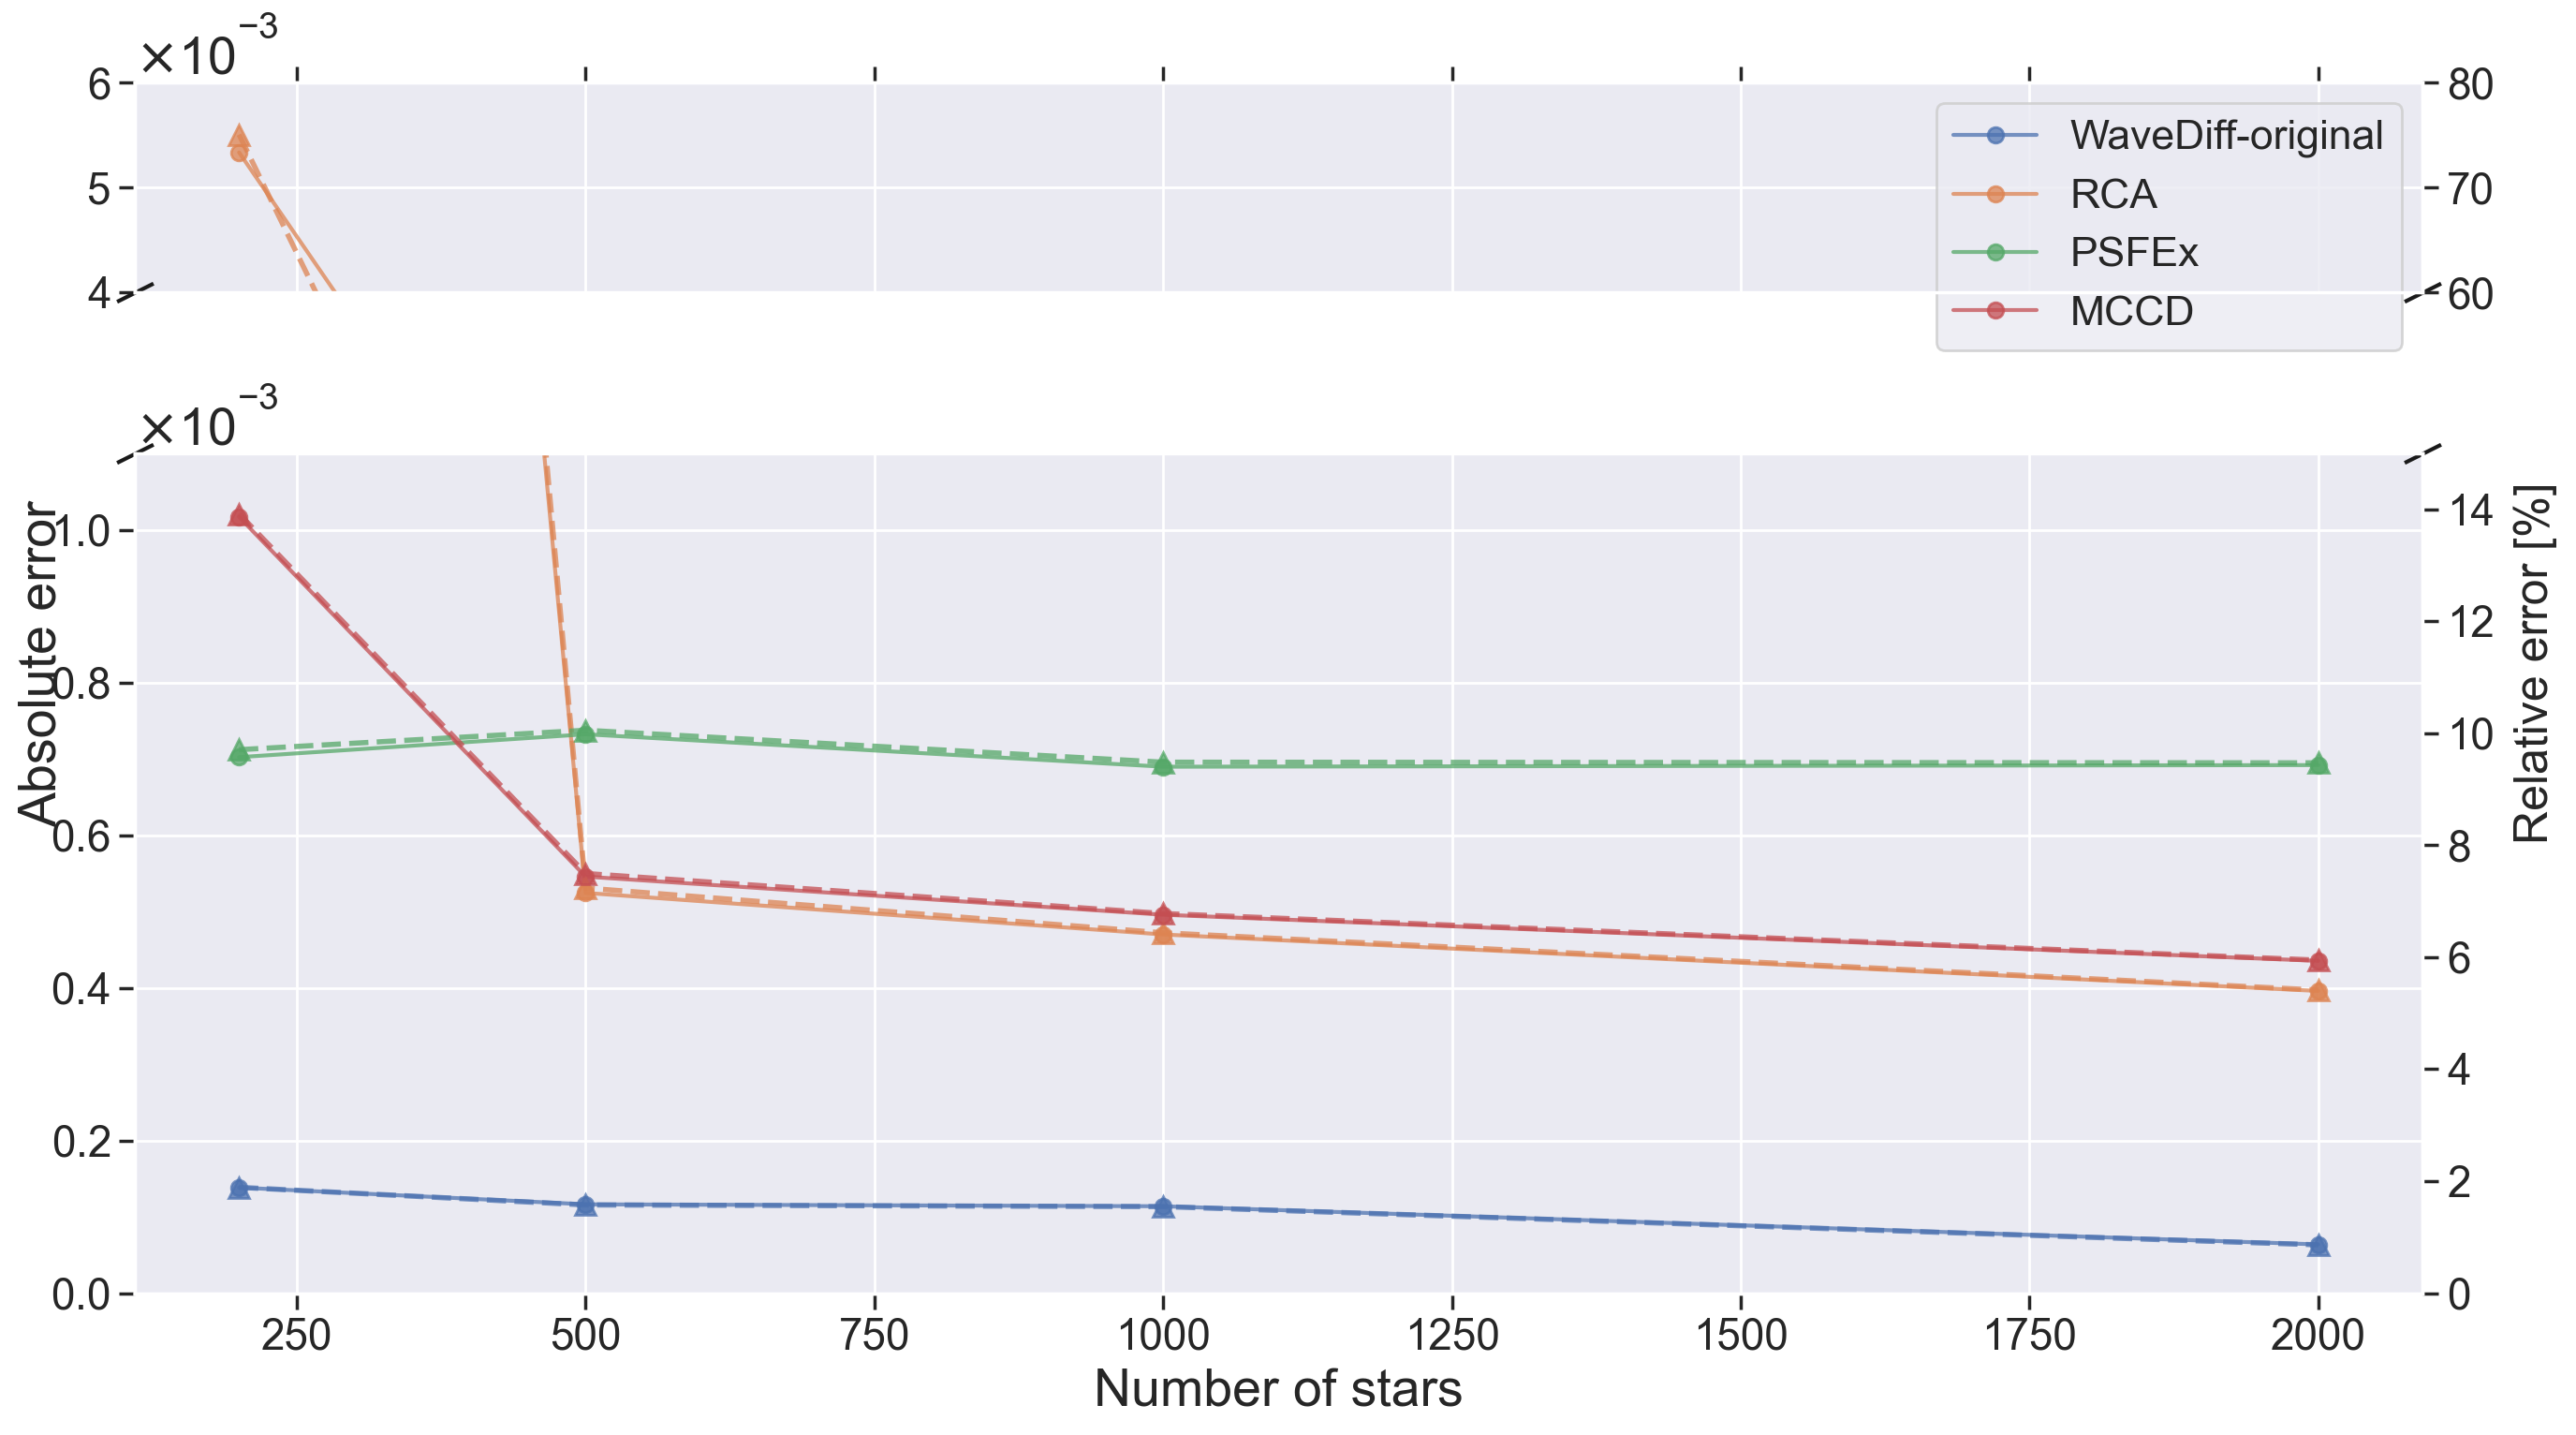

In [12]:
# Define style
define_plot_style()
star_list = np.array([2e2, 5e2, 1e3, 2e3])
sns.set(font_scale=1.5)


fig = plt.figure(figsize=(14,8))
gs = mpl.gridspec.GridSpec(2, 2, height_ratios=[1, 4])
ax1 = fig.add_subplot(gs.new_subplotspec((0, 0), colspan=2))
ax2 = fig.add_subplot(gs.new_subplotspec((1, 0), colspan=2))
fig.subplots_adjust(hspace=0.05)

ax1.plot(star_list, wf_original_polyc_rmse, label='WaveDiff-original', alpha=0.75)
ax1.plot(star_list, rca_n4_up1_k3['rmse'], label='RCA', alpha=0.75)
ax1.plot(star_list, psfex_d3_metrics['rmse'], label='PSFEx', alpha=0.75)
ax1.plot(star_list, mccd_metrics['rmse'], label='MCCD', alpha=0.75)

ax2.plot(star_list, wf_original_polyc_rmse, label='WaveDiff-original', alpha=0.75)
ax2.plot(star_list, rca_n4_up1_k3['rmse'], label='RCA', alpha=0.75)
ax2.plot(star_list, psfex_d3_metrics['rmse'], label='PSFEx', alpha=0.75)
ax2.plot(star_list, mccd_metrics['rmse'], label='MCCD', alpha=0.75)

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(4e-3, 6e-3)  # outliers only
ax2.set_ylim(0, 1.1e-3)  # most of the data

# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.ticklabel_format(style='sci',scilimits=(0,0),axis='y')
ax1.yaxis.set_offset_position('left')
ax1.yaxis.offsetText.set(size=20)


ax2.yaxis.major.formatter._useMathText = True
ax2.ticklabel_format(style='sci',scilimits=(0,0),axis='y')
ax2.yaxis.set_offset_position('left')
ax2.yaxis.offsetText.set(size=20)

ax1.legend(prop={'size': 16}, loc='upper right')
ax2.set_xlabel('Number of stars', fontsize = 20)
ax2.set_ylabel('Absolute error', fontsize = 20)
ax2.yaxis.set_label_coords(-0.03,0.75)
# ax1.set_ylabel('Absolute error', fontsize = 20)

# Nice separating lines
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs_lines = dict(marker=[(-1, -d), (1, d)], markersize=14,
                    linestyle="none", color='k', mec='k', mew=1.5, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs_lines)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs_lines)


kwargs = dict(linewidth=2, linestyle='dashed', alpha=0.75, markersize=8, marker='^')

ax1_rel = ax1.twinx()
ax2_rel = ax2.twinx()

ax1_rel.plot(star_list, wf_original_polyc_rel_rmse, **kwargs)
ax1_rel.plot(star_list, rca_n4_up1_k3['rel_rmse'], **kwargs)
ax1_rel.plot(star_list, psfex_d3_metrics['rel_rmse'], **kwargs)
ax1_rel.plot(star_list, mccd_metrics['rel_rmse'], **kwargs)

ax2_rel.plot(star_list, wf_original_polyc_rel_rmse, **kwargs)
ax2_rel.plot(star_list, rca_n4_up1_k3['rel_rmse'], **kwargs)
ax2_rel.plot(star_list, psfex_d3_metrics['rel_rmse'], **kwargs)
ax2_rel.plot(star_list, mccd_metrics['rel_rmse'], **kwargs)

ax1_rel.grid(False)
ax2_rel.set_ylabel('Relative error [%]')   
ax2_rel.yaxis.set_label_coords(1.04,0.75, transform=ax2_rel.transAxes)
ax2_rel.grid(False)

# zoom-in / limit the view to different portions of the data
ax1_rel.set_ylim(60, 80)  # outliers only
ax2_rel.set_ylim(0, 15)  # most of the data

# plt.savefig(saving_folder + 'PixRMSE_vs_NbStars_WF_SOTA.pdf')
plt.show()



## Observation resolution v2

### All the models

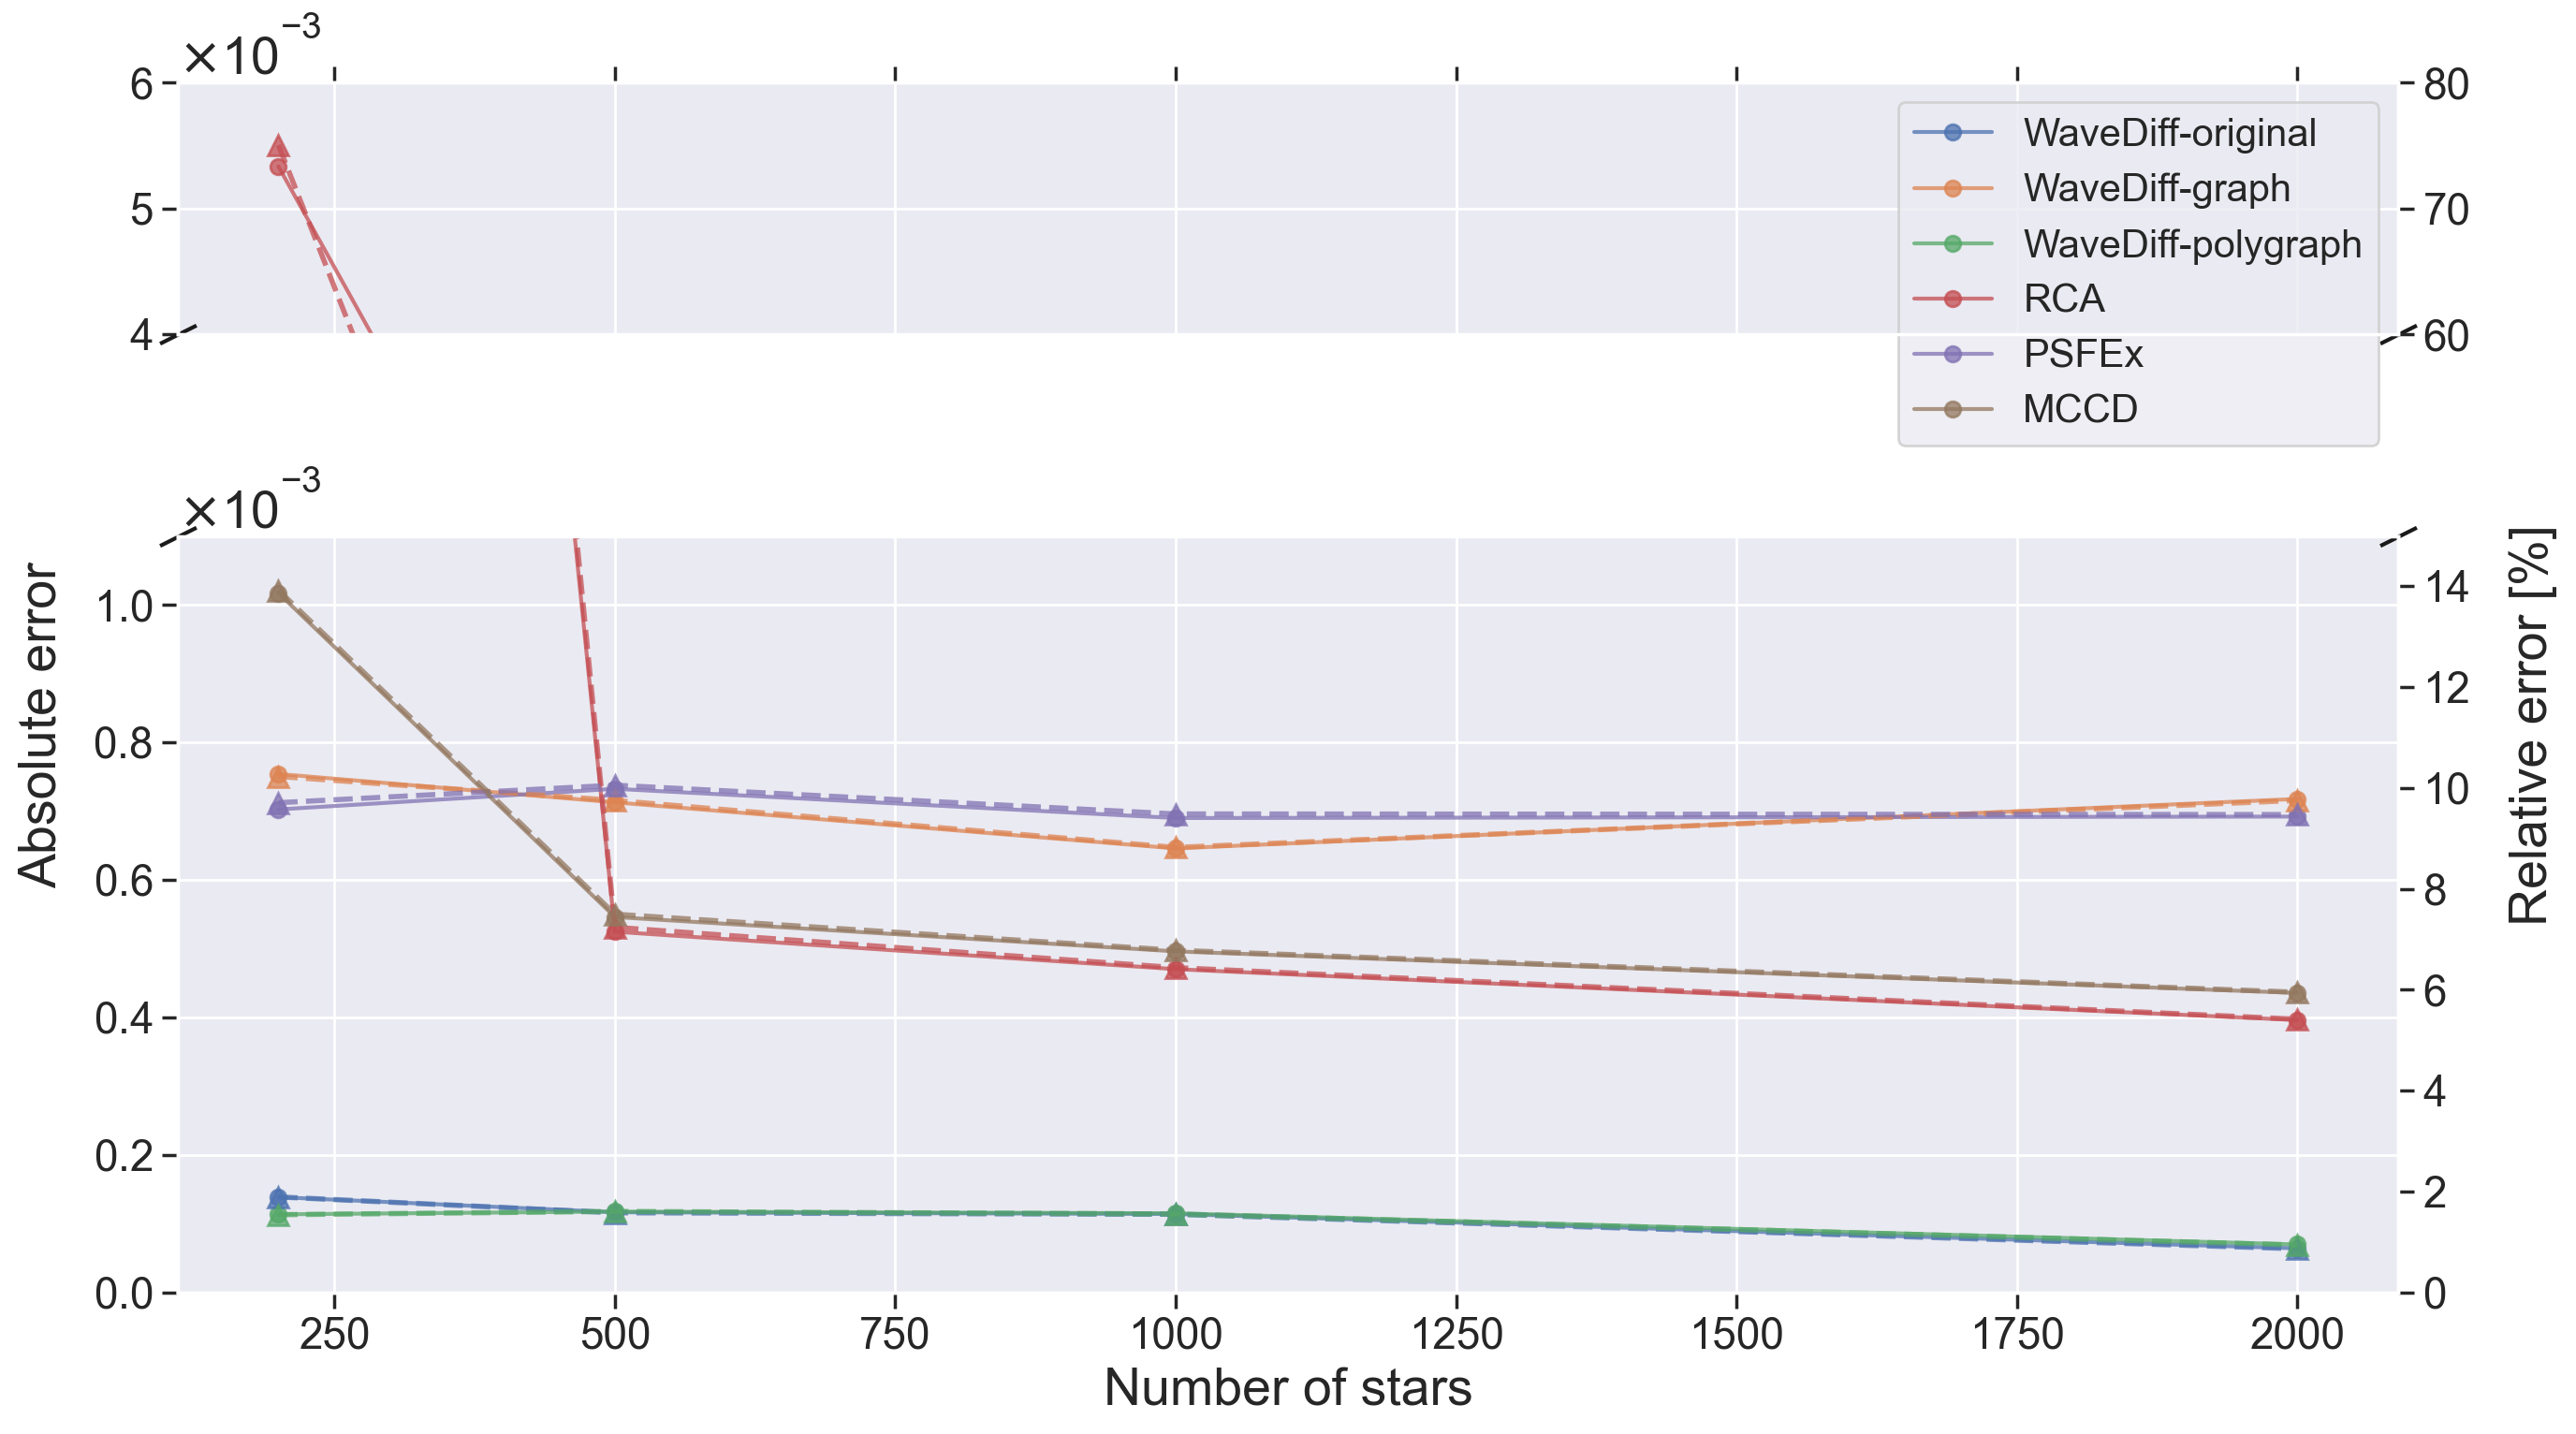

In [13]:

# Define style
define_plot_style()
star_list = np.array([2e2, 5e2, 1e3, 2e3])
sns.set(font_scale=1.5)


fig = plt.figure(figsize=(14,8))
gs = mpl.gridspec.GridSpec(2, 2, height_ratios=[1, 3])
ax1 = fig.add_subplot(gs.new_subplotspec((0, 0), colspan=2))
ax2 = fig.add_subplot(gs.new_subplotspec((1, 0), colspan=2))
fig.subplots_adjust(hspace=0.05)

ax1.plot(star_list, wf_original_polyc_rmse, label='WaveDiff-original', alpha=0.75)
ax1.plot(star_list, wf_graph_polyc_rmse, label='WaveDiff-graph', alpha=0.75)
ax1.plot(star_list, wf_polygraph_polyc_rmse, label='WaveDiff-polygraph', alpha=0.75)
ax1.plot(star_list, rca_n4_up1_k3['rmse'], label='RCA', alpha=0.75)
ax1.plot(star_list, psfex_d3_metrics['rmse'], label='PSFEx', alpha=0.75)
ax1.plot(star_list, mccd_metrics['rmse'], label='MCCD', alpha=0.75)

ax2.plot(star_list, wf_original_polyc_rmse, label='WaveDiff-original', alpha=0.75)
ax2.plot(star_list, wf_graph_polyc_rmse, label='WaveDiff-graph', alpha=0.75)
ax2.plot(star_list, wf_polygraph_polyc_rmse, label='WaveDiff-polygraph', alpha=0.75)
ax2.plot(star_list, rca_n4_up1_k3['rmse'], label='RCA', alpha=0.75)
ax2.plot(star_list, psfex_d3_metrics['rmse'], label='PSFEx', alpha=0.75)
ax2.plot(star_list, mccd_metrics['rmse'], label='MCCD', alpha=0.75)

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(4e-3, 6e-3)  # outliers only
ax2.set_ylim(0, 1.1e-3)  # most of the data

# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.ticklabel_format(style='sci',scilimits=(0,0),axis='y')
ax1.yaxis.set_offset_position('left')
ax1.yaxis.offsetText.set(size=20)


ax2.yaxis.major.formatter._useMathText = True
ax2.ticklabel_format(style='sci',scilimits=(0,0),axis='y')
ax2.yaxis.set_offset_position('left')
ax2.yaxis.offsetText.set(size=20)

ax1.legend(prop={'size': 15}, loc='upper right')

ax2.set_xlabel('Number of stars', fontsize = 20)
ax2.set_ylabel('Absolute error', fontsize = 20)
ax2.yaxis.set_label_coords(-0.05,0.75)
# ax1.set_ylabel('Absolute error', fontsize = 20)

# Nice separating lines
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs_lines = dict(marker=[(-1, -d), (1, d)], markersize=14,
                    linestyle="none", color='k', mec='k', mew=1.5, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs_lines)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs_lines)


kwargs = dict(linewidth=2, linestyle='dashed', alpha=0.75, markersize=8, marker='^')

ax1_rel = ax1.twinx()
ax2_rel = ax2.twinx()

ax1_rel.plot(star_list, wf_original_polyc_rel_rmse, **kwargs)
ax1_rel.plot(star_list, wf_graph_polyc_rel_rmse, **kwargs)
ax1_rel.plot(star_list, wf_polygraph_polyc_rel_rmse, **kwargs)
ax1_rel.plot(star_list, rca_n4_up1_k3['rel_rmse'], **kwargs)
ax1_rel.plot(star_list, psfex_d3_metrics['rel_rmse'], **kwargs)
ax1_rel.plot(star_list, mccd_metrics['rel_rmse'], **kwargs)

ax2_rel.plot(star_list, wf_original_polyc_rel_rmse, **kwargs)
ax2_rel.plot(star_list, wf_graph_polyc_rel_rmse, **kwargs)
ax2_rel.plot(star_list, wf_polygraph_polyc_rel_rmse, **kwargs)
ax2_rel.plot(star_list, rca_n4_up1_k3['rel_rmse'], **kwargs)
ax2_rel.plot(star_list, psfex_d3_metrics['rel_rmse'], **kwargs)
ax2_rel.plot(star_list, mccd_metrics['rel_rmse'], **kwargs)

ax1_rel.grid(False)
ax2_rel.set_ylabel('Relative error [%]', fontsize = 20)   
ax2_rel.yaxis.set_label_coords(1.05,0.75, transform=ax2_rel.transAxes)
ax2_rel.grid(False)

# zoom-in / limit the view to different portions of the data
ax1_rel.set_ylim(60, 80)  # outliers only
ax2_rel.set_ylim(0, 15)  # most of the data

# plt.savefig(saving_folder + 'AllModels_PixRMSE_vs_NbStars_WF_SOTA.pdf')
plt.show()




## Observation resolution v3

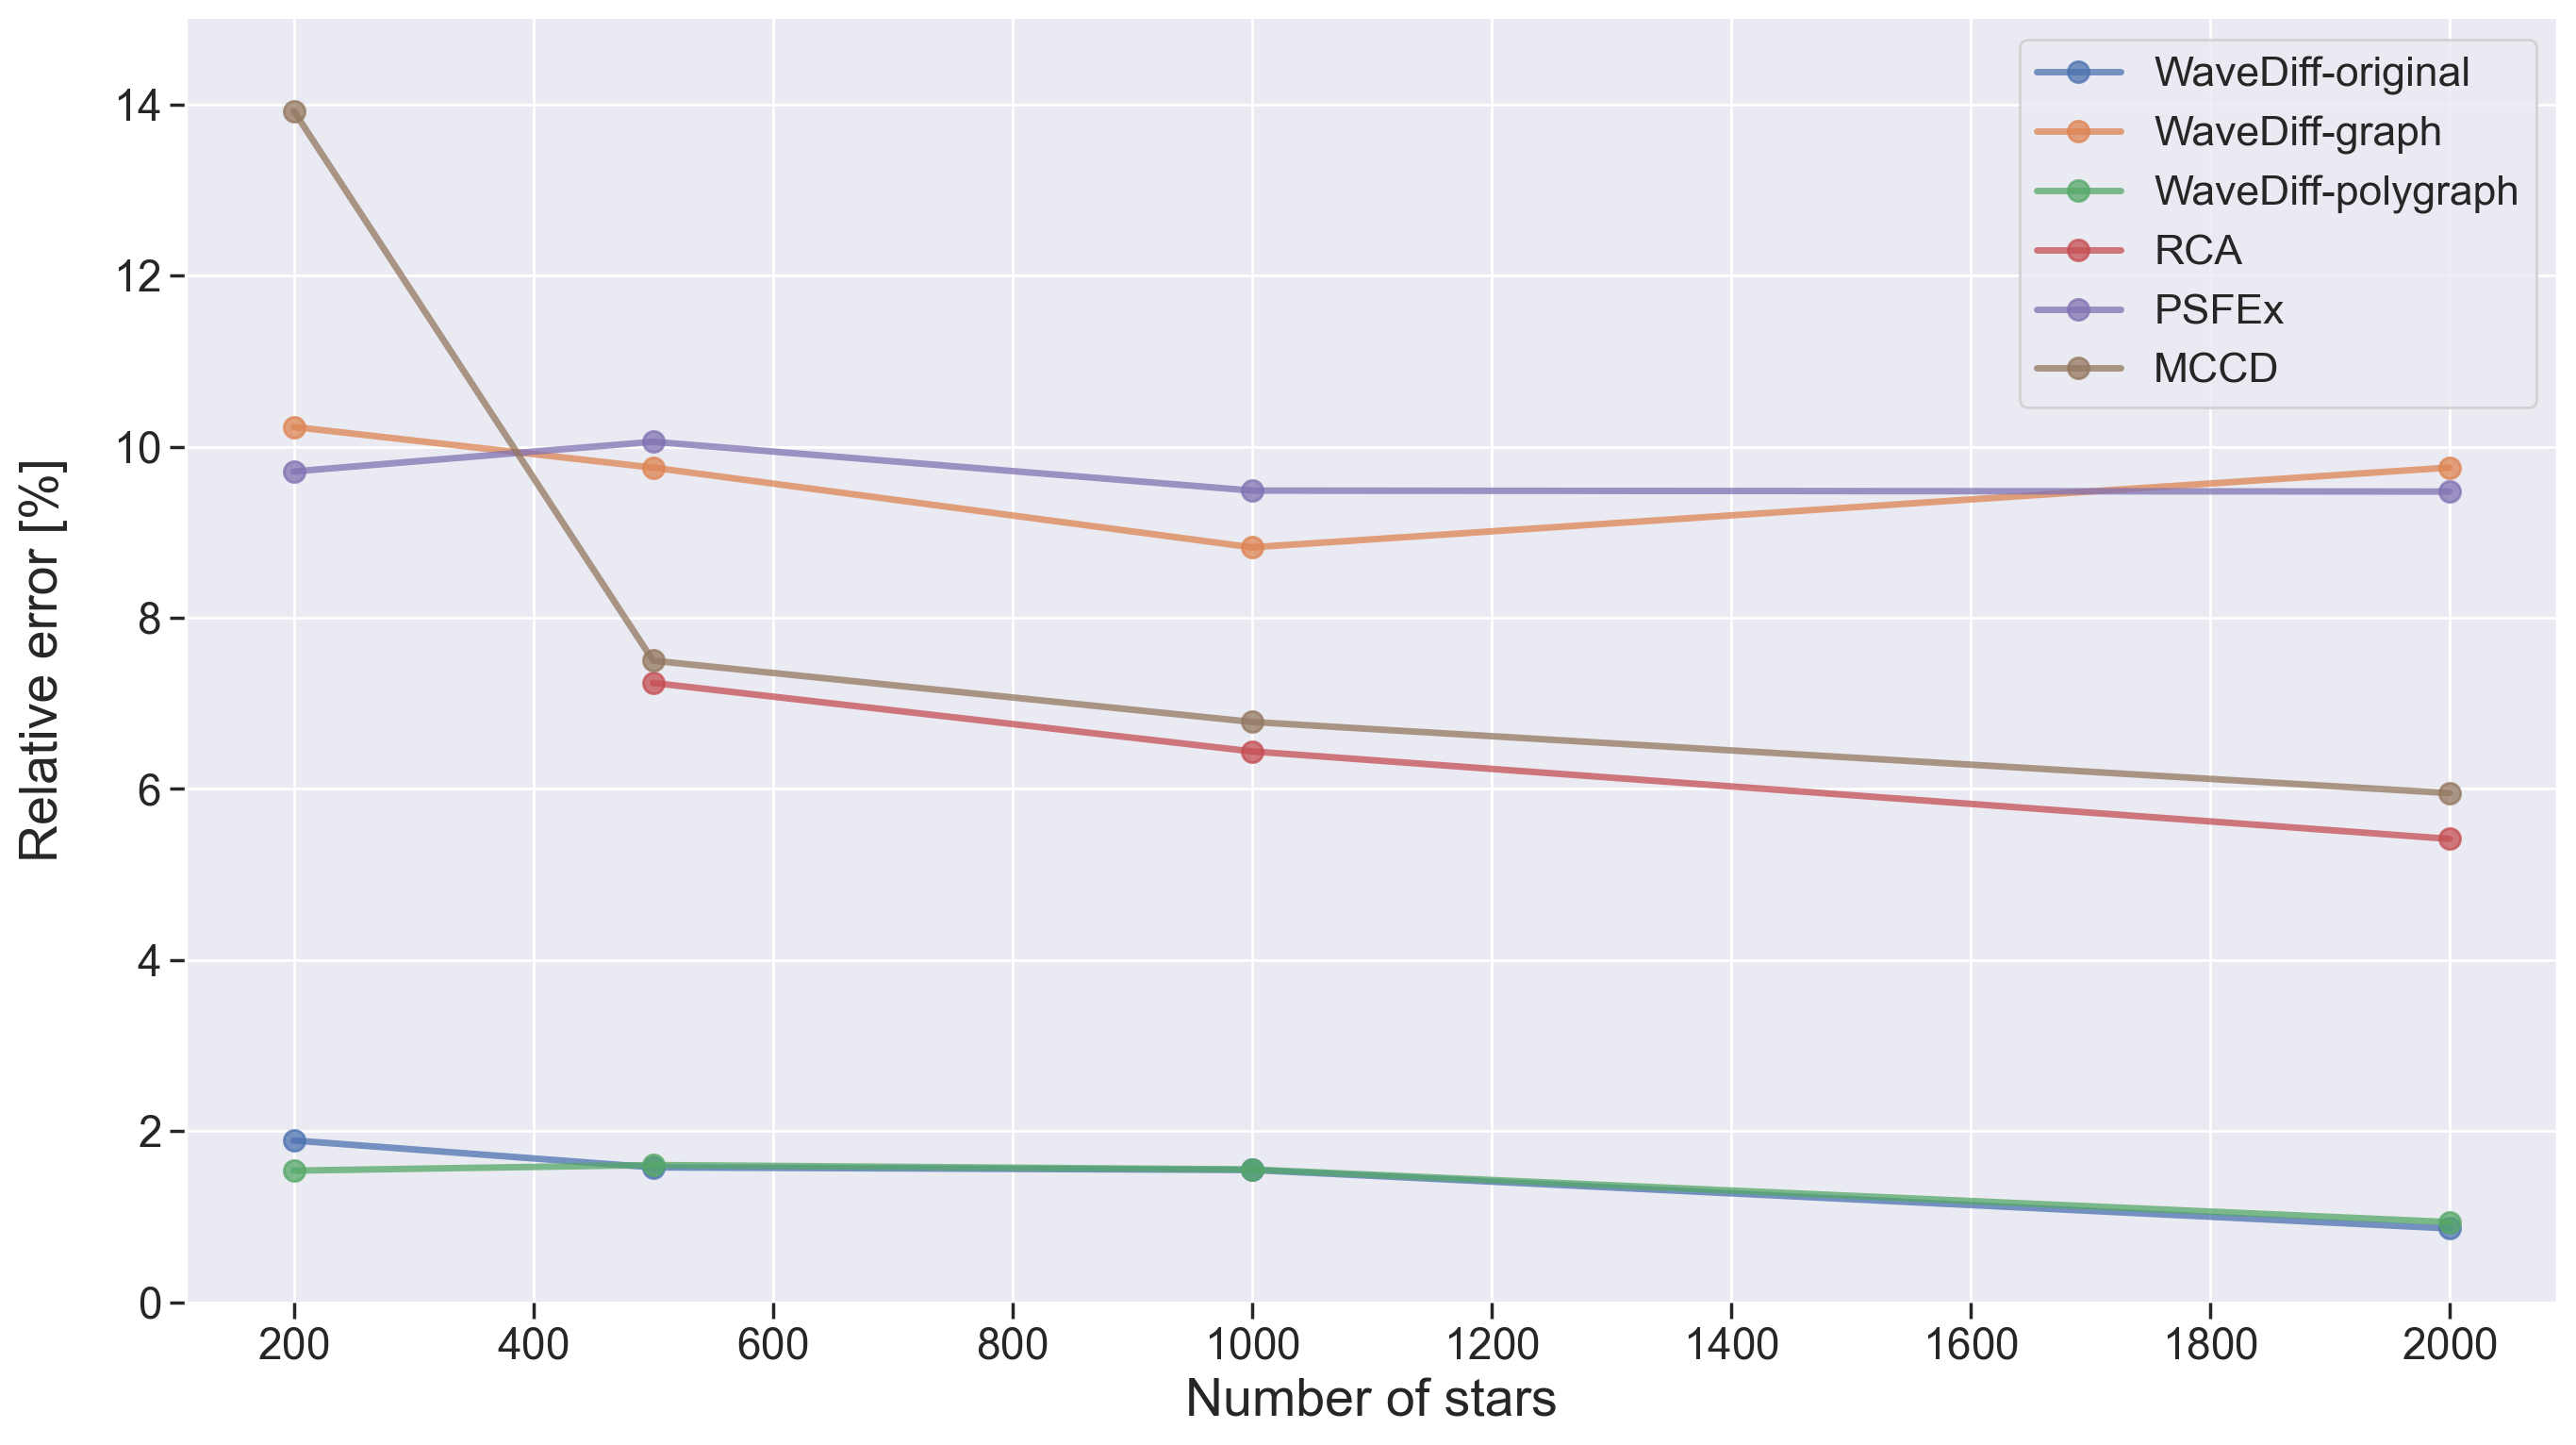

In [14]:
# Define style
define_plot_style()
star_list = np.array([2e2, 5e2, 1e3, 2e3])
sns.set(font_scale=1.5)


fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot()

kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

ax1.plot(star_list, wf_original_polyc_rel_rmse, label='WaveDiff-original', **kwargs)
ax1.plot(star_list, wf_graph_polyc_rel_rmse, label='WaveDiff-graph', **kwargs)
ax1.plot(star_list, wf_polygraph_polyc_rel_rmse, label='WaveDiff-polygraph', **kwargs)
ax1.plot(star_list[1:], rca_n4_up1_k3['rel_rmse'][1:], label='RCA', **kwargs)
ax1.plot(star_list, psfex_d3_metrics['rel_rmse'], label='PSFEx', **kwargs)
ax1.plot(star_list, mccd_metrics['rel_rmse'], label='MCCD', **kwargs)


ax1.set_ylim(0, 15)  # most of the data

ax1.legend(prop={'size': 16})#, loc='upper right')

xtickts = np.linspace(2e2, 2e3, 10)
plt.xticks(xtickts)


ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
# ax1.xaxis.tick_top()

# ax1.xaxis.tick_top()
# ax1.tick_params(labeltop=False)  # don't put tick labels at the top

# ax1.yaxis.tick_top()
# ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()


# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.xaxis.major.formatter._useMathText = True

ax1.set_ylabel('Relative error [%]', fontsize = 20)   
ax1.yaxis.set_label_coords(-0.05,0.5, transform=ax1.transAxes)
ax1.set_xlabel('Number of stars', fontsize = 20)


plt.savefig(saving_folder + 'AllModels_relative_PixRMSE_vs_NbStars_WF_SOTA.pdf')
plt.show()

 

# Super resolution

## Super resolution v1

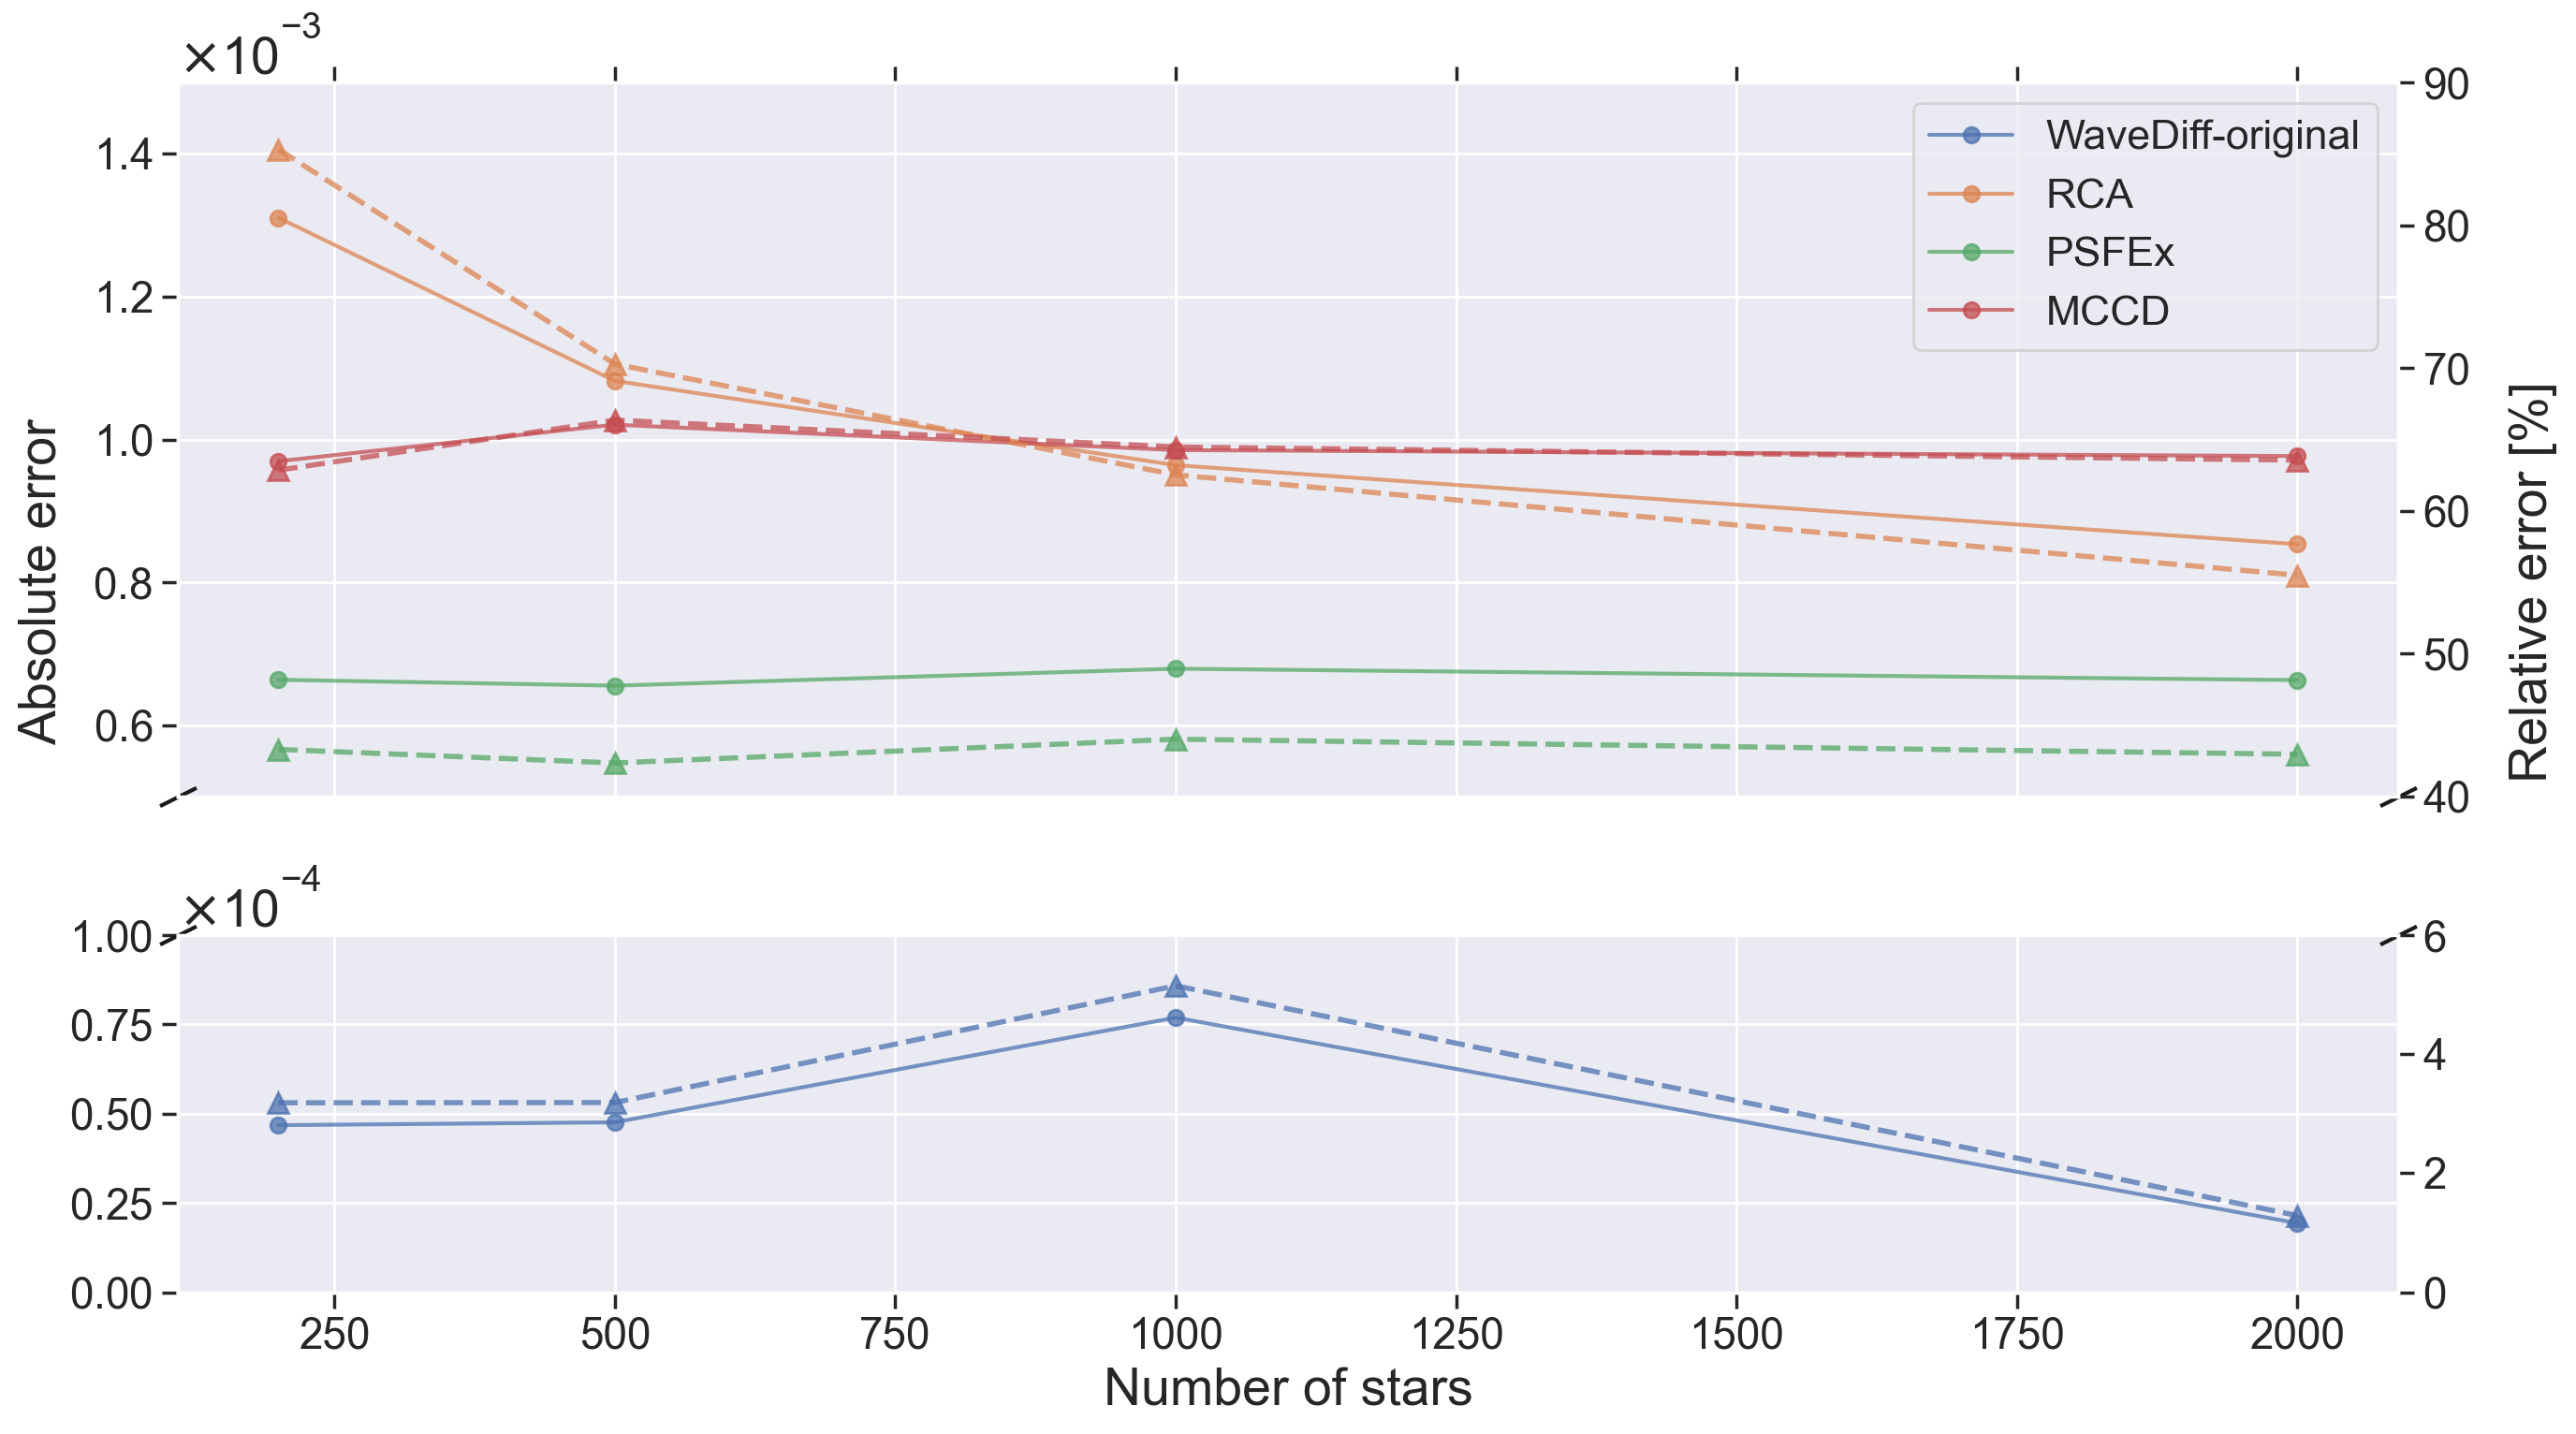

In [15]:
# Define style
define_plot_style()
star_list = np.array([2e2, 5e2, 1e3, 2e3])
sns.set(font_scale=1.5)

fig = plt.figure(figsize=(14,8))
gs = mpl.gridspec.GridSpec(2, 2, height_ratios=[2, 1])
ax1 = fig.add_subplot(gs.new_subplotspec((0, 0), colspan=2))
ax2 = fig.add_subplot(gs.new_subplotspec((1, 0), colspan=2))
fig.subplots_adjust(hspace=0.05)

ax1.plot(star_list, wf_original_polyc_SR_rmse, label='WaveDiff-original', alpha=0.75)
ax1.plot(star_list, rca_SR_rmse, label='RCA', alpha=0.75)
ax1.plot(star_list, psfex_SR_rmse, label='PSFEx', alpha=0.75)
ax1.plot(star_list, mccd_SR_rmse, label='MCCD', alpha=0.75)

ax2.plot(star_list, wf_original_polyc_SR_rmse, label='WaveDiff-original', alpha=0.75)
ax2.plot(star_list, rca_SR_rmse, label='RCA', alpha=0.75)
ax2.plot(star_list, psfex_SR_rmse, label='PSFEx', alpha=0.75)
ax2.plot(star_list, mccd_SR_rmse, label='MCCD', alpha=0.75)

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(5e-4, 1.5e-3)  # outliers only
ax2.set_ylim(0, 1.0e-4)  # most of the data

# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.ticklabel_format(style='sci',scilimits=(0,0),axis='y')
ax1.yaxis.set_offset_position('left')
ax1.yaxis.offsetText.set(size=20)


ax2.yaxis.major.formatter._useMathText = True
ax2.ticklabel_format(style='sci',scilimits=(0,0),axis='y')
ax2.yaxis.set_offset_position('left')
ax2.yaxis.offsetText.set(size=20)

ax1.legend(prop={'size': 16})
ax2.set_xlabel('Number of stars', fontsize = 20)
ax1.set_ylabel('Absolute error', fontsize = 20)
ax1.yaxis.set_label_coords(-0.05,0.3, transform=ax1.transAxes)
# ax1.set_ylabel('Absolute error', fontsize = 20)

# Nice separating lines
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs_lines = dict(marker=[(-1, -d), (1, d)], markersize=14,
                    linestyle="none", color='k', mec='k', mew=1.5, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs_lines)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs_lines)


kwargs = dict(linewidth=2, linestyle='dashed', alpha=0.75, markersize=8, marker='^')

ax1_rel = ax1.twinx()
ax2_rel = ax2.twinx()

ax1_rel.plot(star_list, wf_original_polyc_SR_rel_rmse, **kwargs)
ax1_rel.plot(star_list, rca_SR_rel_rmse, **kwargs)
ax1_rel.plot(star_list, psfex_SR_rel_rmse, **kwargs)
ax1_rel.plot(star_list, mccd_SR_rel_rmse, **kwargs)

ax2_rel.plot(star_list, wf_original_polyc_SR_rel_rmse, **kwargs)
ax2_rel.plot(star_list, rca_SR_rel_rmse, **kwargs)
ax2_rel.plot(star_list, psfex_SR_rel_rmse, **kwargs)
ax2_rel.plot(star_list, mccd_SR_rel_rmse, **kwargs)

ax1_rel.grid(False)
ax1_rel.set_ylabel('Relative error [%]', fontsize = 20)   
ax1_rel.yaxis.set_label_coords(1.05,0.3, transform=ax1_rel.transAxes)
ax2_rel.grid(False)

# zoom-in / limit the view to different portions of the data
ax1_rel.set_ylim(40, 90)  # outliers only
ax2_rel.set_ylim(0, 6.)  # most of the data

# plt.savefig(saving_folder + 'SR_PixRMSE_vs_NbStars_WF_SOTA.pdf')
plt.show()


### All the models

## Super resolution v2

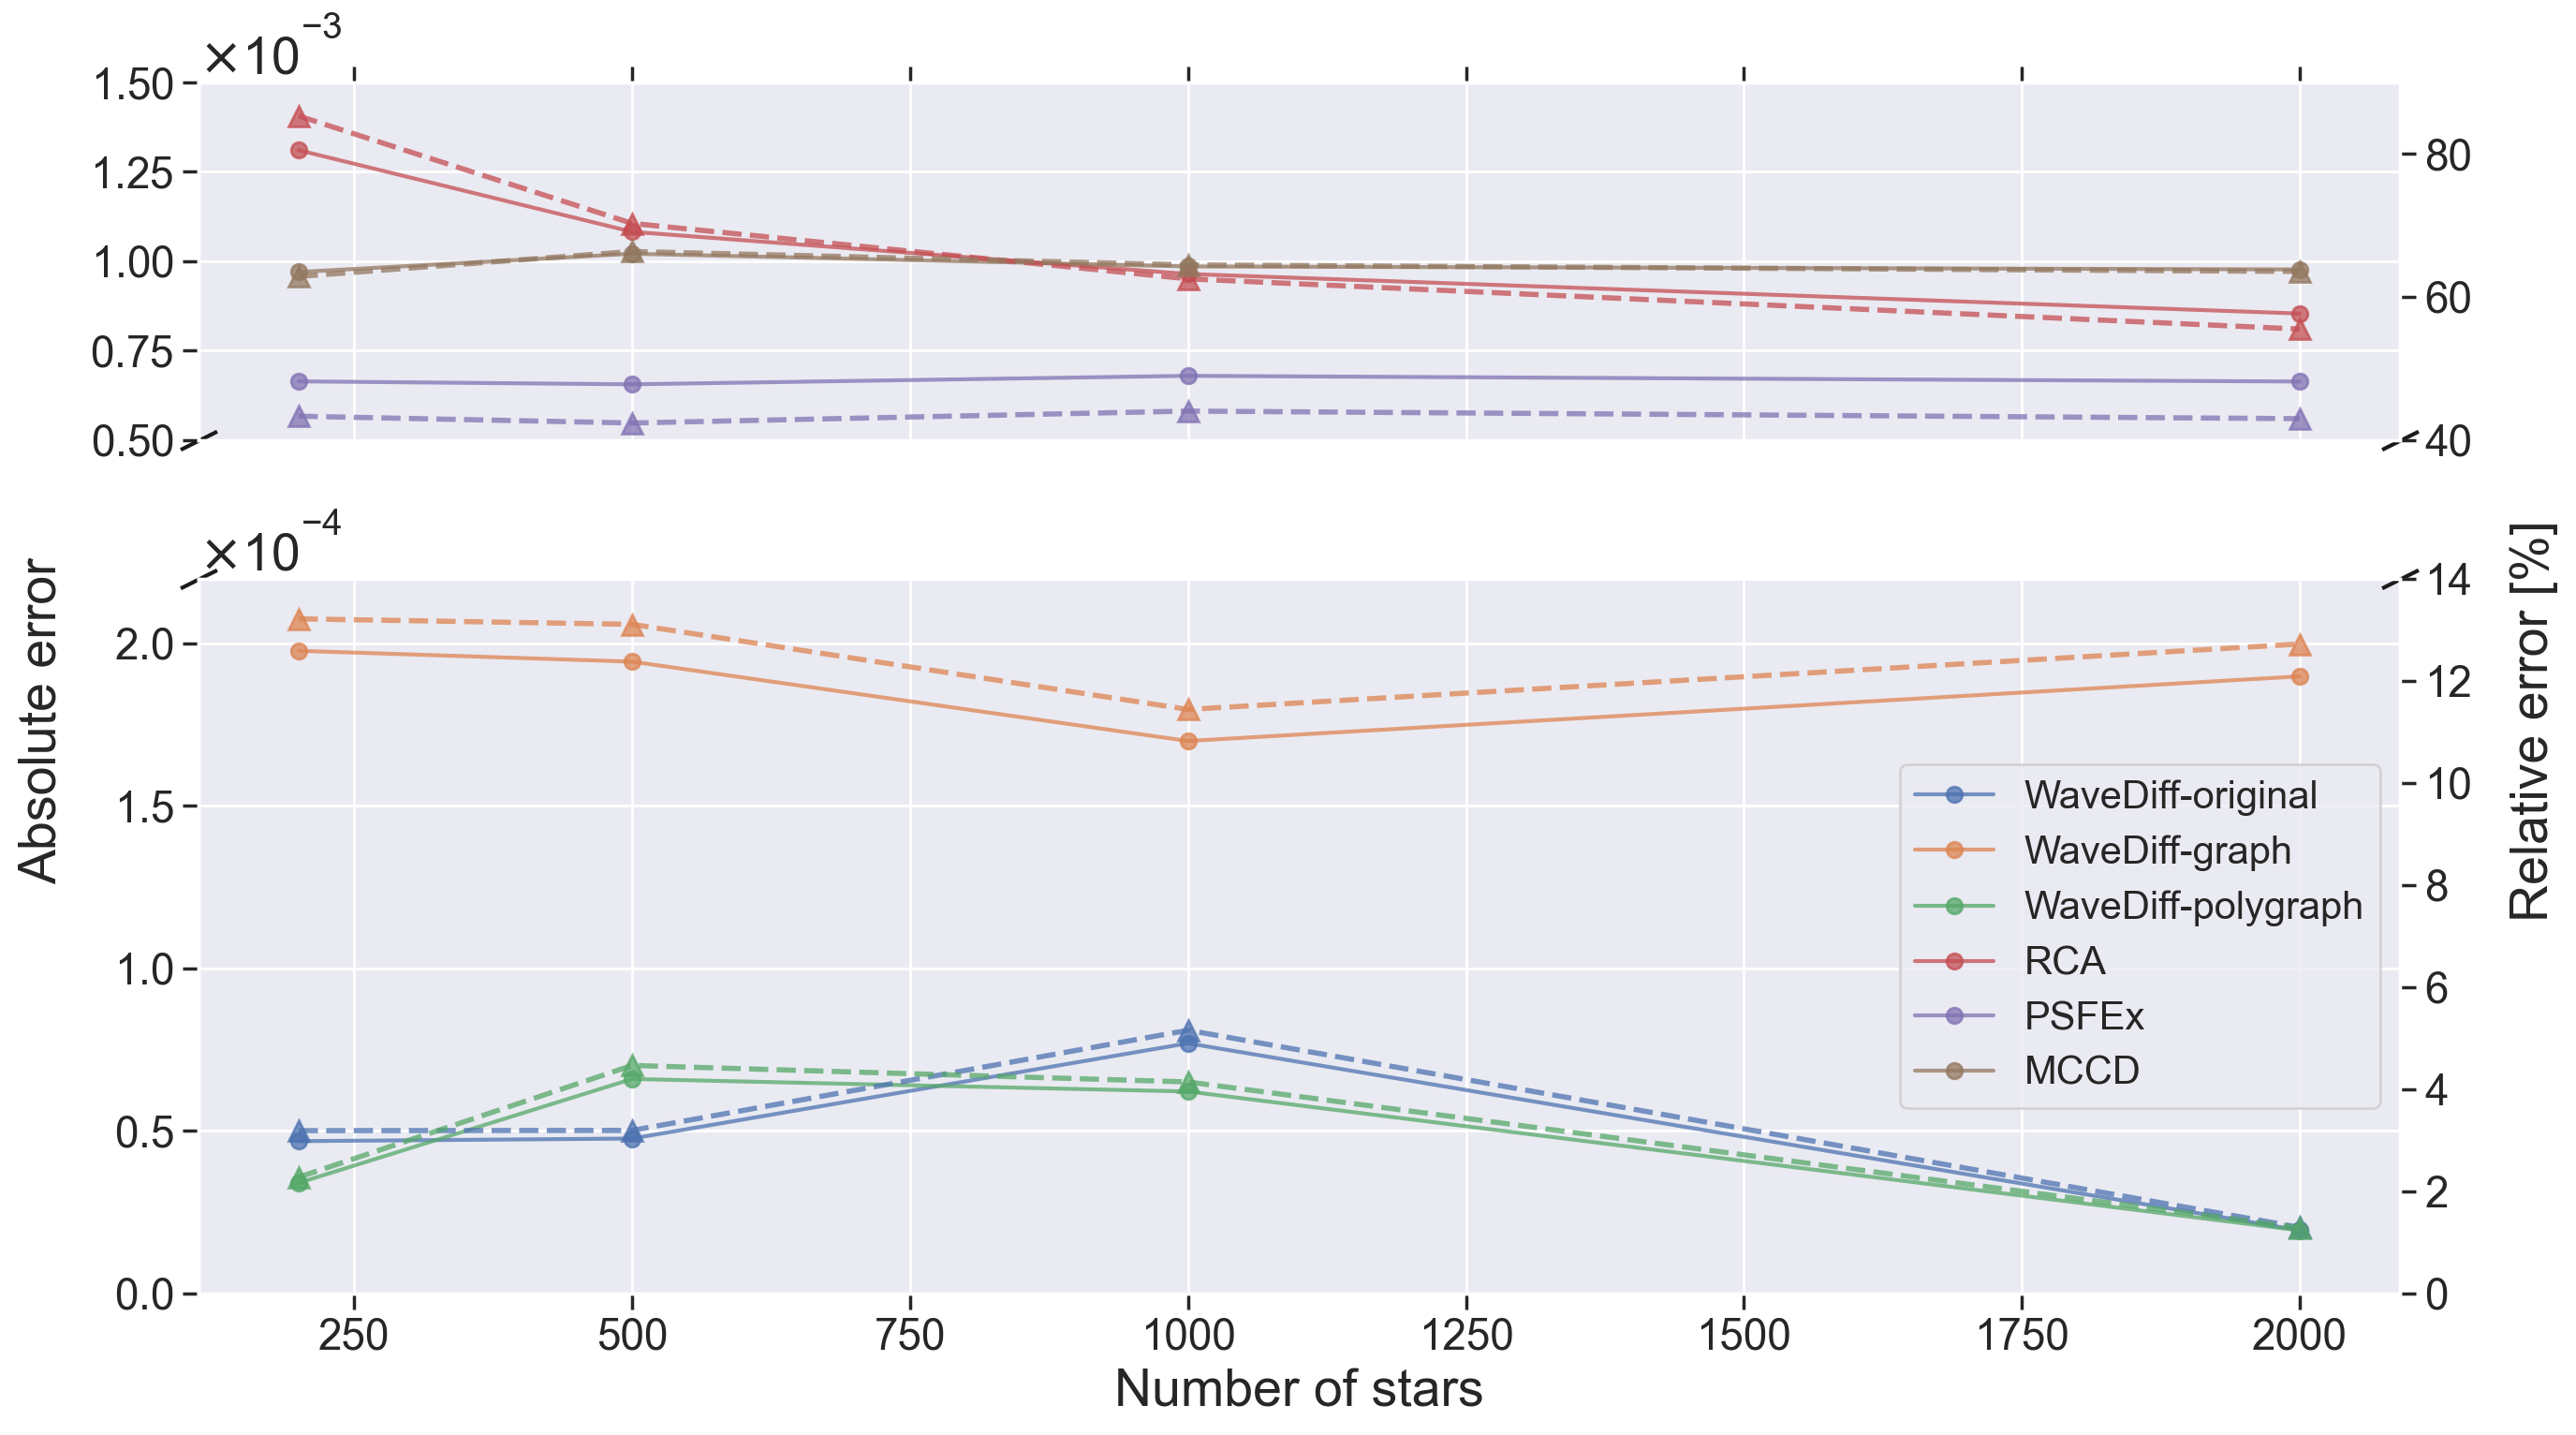

In [16]:
# Define style
define_plot_style()
star_list = np.array([2e2, 5e2, 1e3, 2e3])
sns.set(font_scale=1.5)

fig = plt.figure(figsize=(14,8))
gs = mpl.gridspec.GridSpec(2, 2, height_ratios=[1, 2])
ax1 = fig.add_subplot(gs.new_subplotspec((0, 0), colspan=2))
ax2 = fig.add_subplot(gs.new_subplotspec((1, 0), colspan=2))
fig.subplots_adjust(hspace=0.05)

ax1.plot(star_list, wf_original_polyc_SR_rmse, label='WaveDiff-original', alpha=0.75)
ax1.plot(star_list, wf_graph_polyc_SR_rmse, label='WaveDiff-graph', alpha=0.75)
ax1.plot(star_list, wf_polygraph_polyc_SR_rmse, label='WaveDiff-polygraph', alpha=0.75)
ax1.plot(star_list, rca_SR_rmse, label='RCA', alpha=0.75)
ax1.plot(star_list, psfex_SR_rmse, label='PSFEx', alpha=0.75)
ax1.plot(star_list, mccd_SR_rmse, label='MCCD', alpha=0.75)

ax2.plot(star_list, wf_original_polyc_SR_rmse, label='WaveDiff-original', alpha=0.75)
ax2.plot(star_list, wf_graph_polyc_SR_rmse, label='WaveDiff-graph', alpha=0.75)
ax2.plot(star_list, wf_polygraph_polyc_SR_rmse, label='WaveDiff-polygraph', alpha=0.75)
ax2.plot(star_list, rca_SR_rmse, label='RCA', alpha=0.75)
ax2.plot(star_list, psfex_SR_rmse, label='PSFEx', alpha=0.75)
ax2.plot(star_list, mccd_SR_rmse, label='MCCD', alpha=0.75)

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(5e-4, 1.5e-3)  # outliers only
ax2.set_ylim(0, 2.2e-4)  # most of the data

# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax1.ticklabel_format(style='sci',scilimits=(0,0),axis='y')
ax1.yaxis.set_offset_position('left')
ax1.yaxis.offsetText.set(size=20)


ax2.yaxis.major.formatter._useMathText = True
ax2.ticklabel_format(style='sci',scilimits=(0,0),axis='y')
ax2.yaxis.set_offset_position('left')
ax2.yaxis.offsetText.set(size=20)

ax2.legend(prop={'size': 15})

ax2.set_xlabel('Number of stars', fontsize = 20)
ax2.set_ylabel('Absolute error', fontsize = 20)
ax2.yaxis.set_label_coords(-0.06,0.8, transform=ax2.transAxes)
# ax1.set_ylabel('Absolute error', fontsize = 20)

# Nice separating lines
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs_lines = dict(marker=[(-1, -d), (1, d)], markersize=14,
                    linestyle="none", color='k', mec='k', mew=1.5, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs_lines)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs_lines)


kwargs = dict(linewidth=2, linestyle='dashed', alpha=0.75, markersize=8, marker='^')

ax1_rel = ax1.twinx()
ax2_rel = ax2.twinx()

ax1_rel.plot(star_list, wf_original_polyc_SR_rel_rmse, **kwargs)
ax1_rel.plot(star_list, wf_graph_polyc_SR_rel_rmse, **kwargs)
ax1_rel.plot(star_list, wf_polygraph_polyc_SR_rel_rmse, **kwargs)
ax1_rel.plot(star_list, rca_SR_rel_rmse, **kwargs)
ax1_rel.plot(star_list, psfex_SR_rel_rmse, **kwargs)
ax1_rel.plot(star_list, mccd_SR_rel_rmse, **kwargs)

ax2_rel.plot(star_list, wf_original_polyc_SR_rel_rmse, **kwargs)
ax2_rel.plot(star_list, wf_graph_polyc_SR_rel_rmse, **kwargs)
ax2_rel.plot(star_list, wf_polygraph_polyc_SR_rel_rmse, **kwargs)
ax2_rel.plot(star_list, rca_SR_rel_rmse, **kwargs)
ax2_rel.plot(star_list, psfex_SR_rel_rmse, **kwargs)
ax2_rel.plot(star_list, mccd_SR_rel_rmse, **kwargs)

ax1_rel.grid(False)
ax2_rel.set_ylabel('Relative error [%]', fontsize = 20)   
ax2_rel.yaxis.set_label_coords(1.05,0.8, transform=ax2_rel.transAxes)
ax2_rel.grid(False)

# zoom-in / limit the view to different portions of the data
ax1_rel.set_ylim(40, 90)  # outliers only
ax2_rel.set_ylim(0, 14.)  # most of the data

# plt.savefig(saving_folder + 'SR_AllModels_PixRMSE_vs_NbStars_WF_SOTA.pdf')
plt.show()


## Super resolution v3

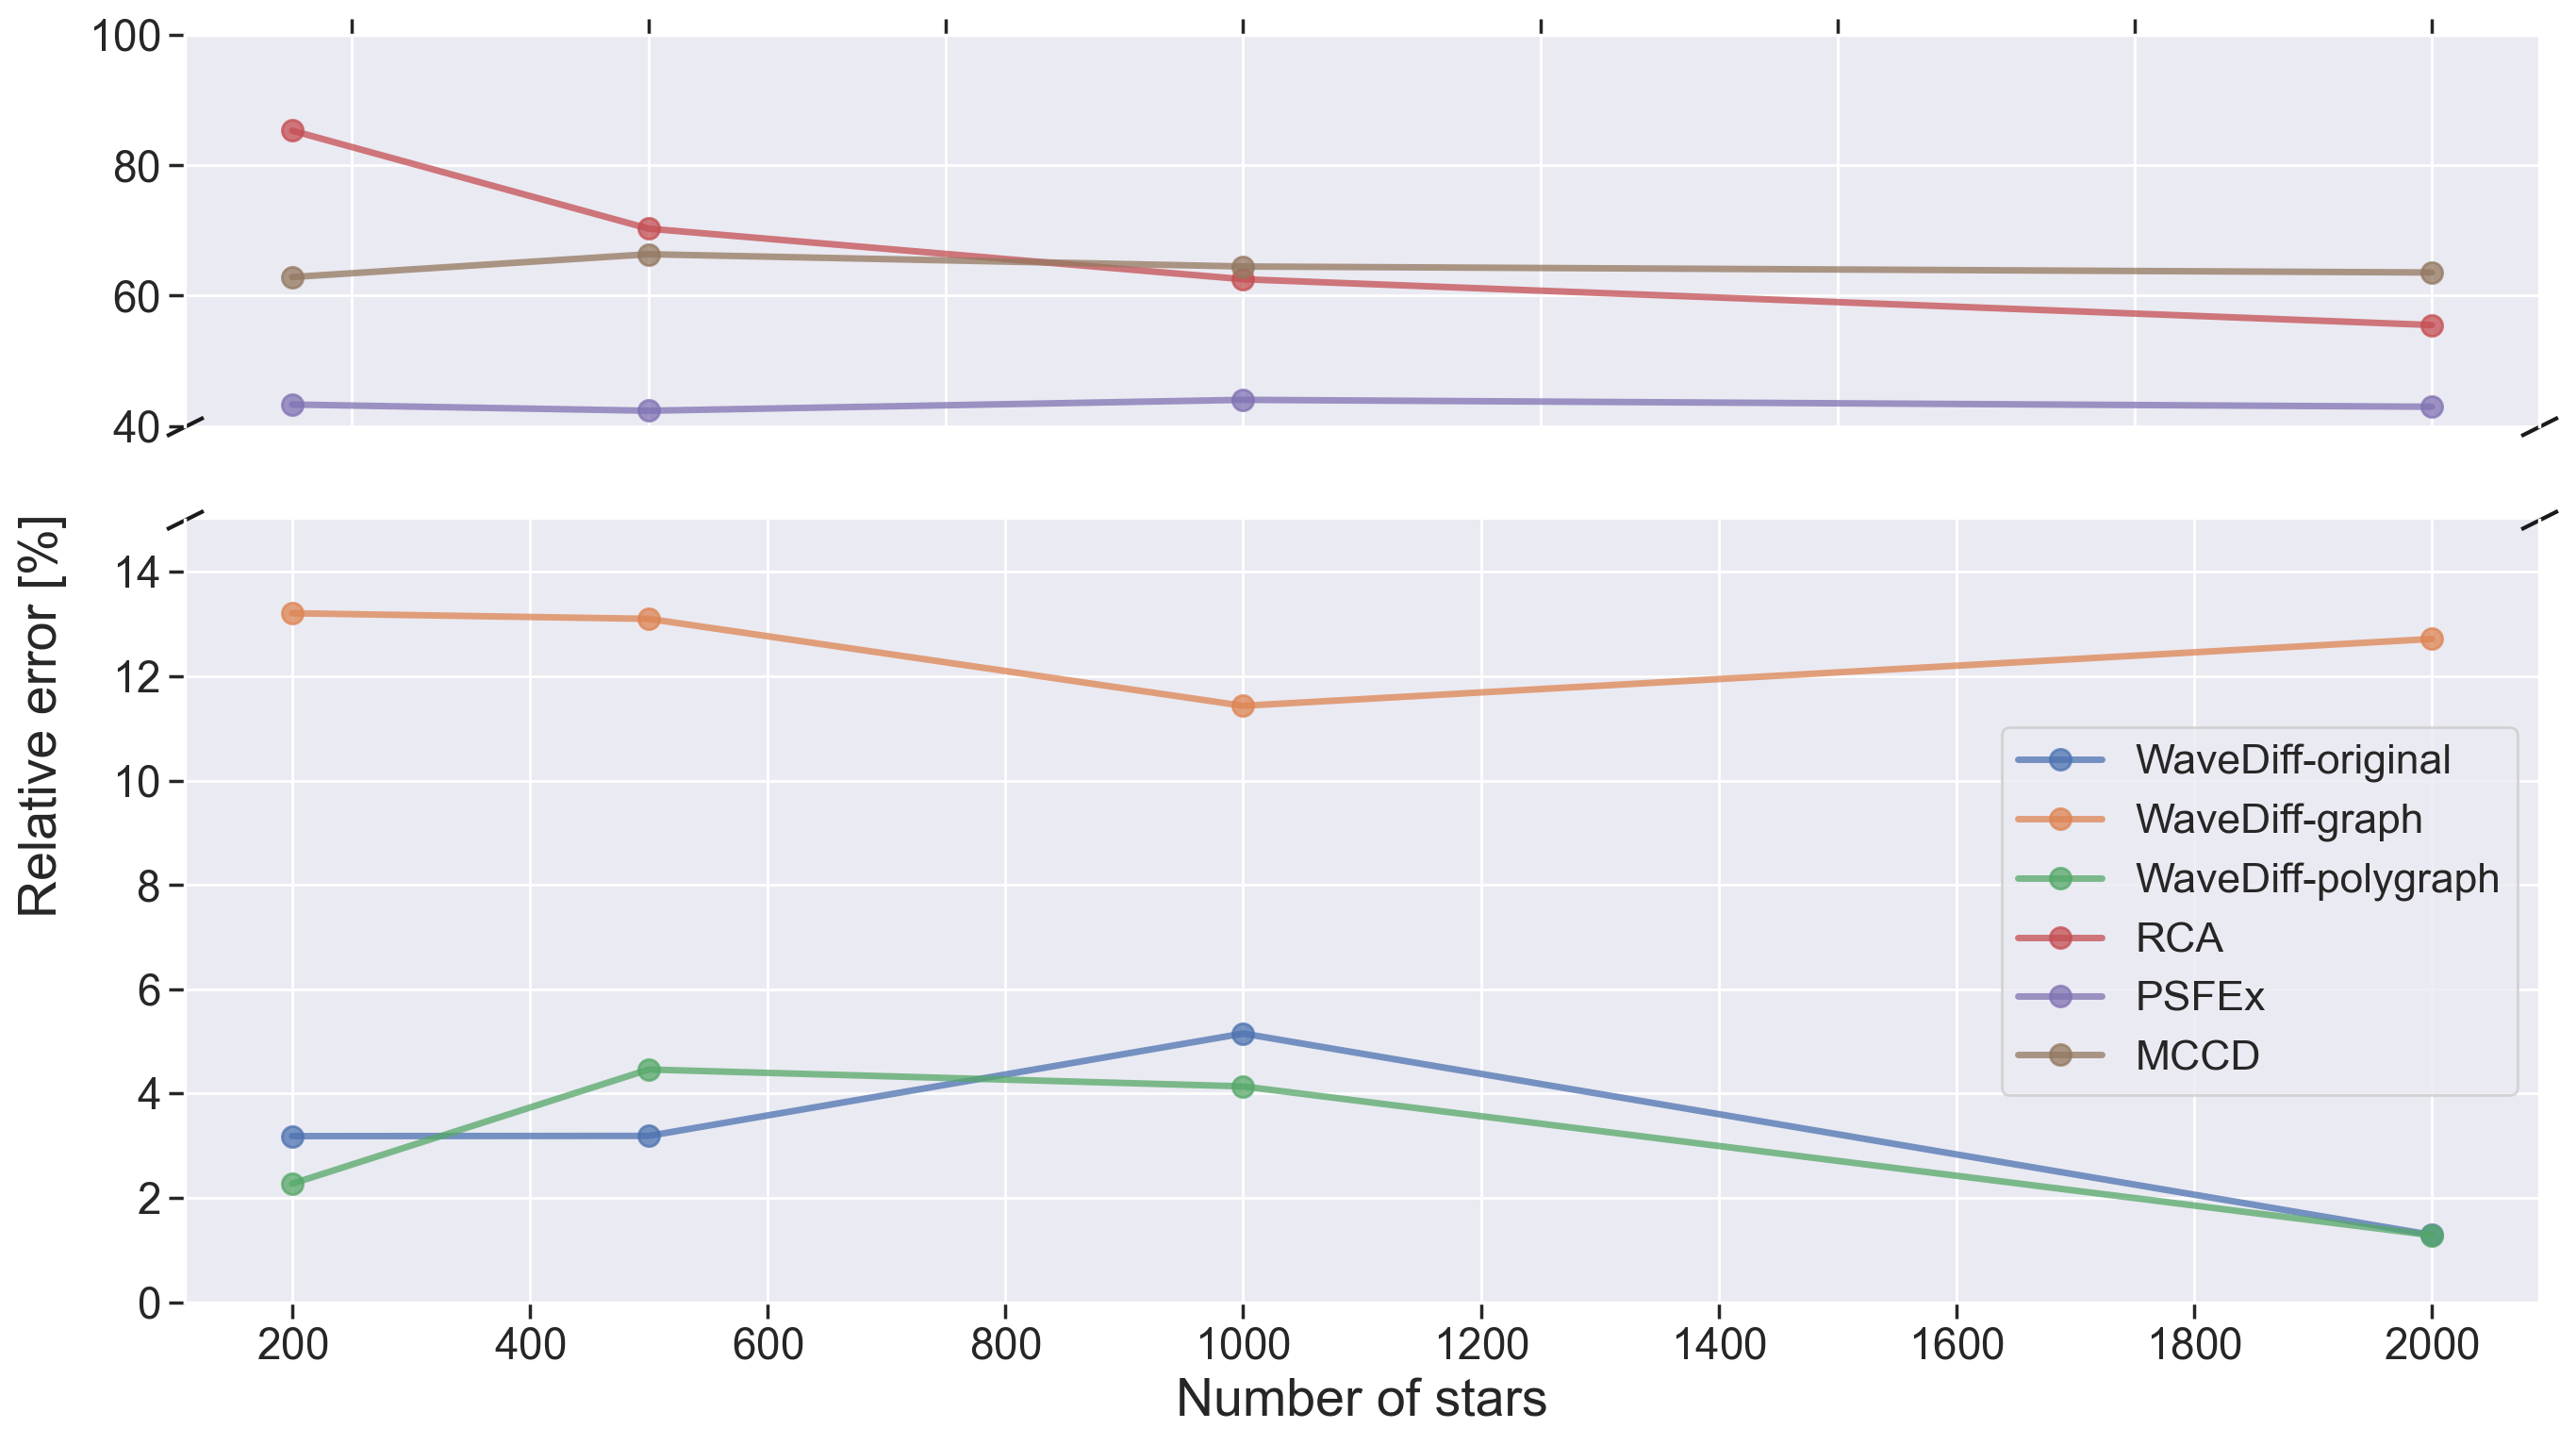

In [17]:
# Define style
define_plot_style()
star_list = np.array([2e2, 5e2, 1e3, 2e3])
sns.set(font_scale=1.5)



fig = plt.figure(figsize=(14,8))
gs = mpl.gridspec.GridSpec(2, 2, height_ratios=[1, 2])
ax1 = fig.add_subplot(gs.new_subplotspec((0, 0), colspan=2))
ax2 = fig.add_subplot(gs.new_subplotspec((1, 0), colspan=2))
fig.subplots_adjust(hspace=0.05)


kwargs = dict(linewidth=2.5, alpha=0.75, markersize=8)

ax1.plot(star_list, wf_original_polyc_SR_rel_rmse, label='WaveDiff-original', **kwargs)
ax1.plot(star_list, wf_graph_polyc_SR_rel_rmse, label='WaveDiff-graph', **kwargs)
ax1.plot(star_list, wf_polygraph_polyc_SR_rel_rmse, label='WaveDiff-polygraph', **kwargs)
ax1.plot(star_list, rca_SR_rel_rmse, label='RCA', **kwargs)
ax1.plot(star_list, psfex_SR_rel_rmse, label='PSFEx', **kwargs)
ax1.plot(star_list, mccd_SR_rel_rmse, label='MCCD', **kwargs)

ax2.plot(star_list, wf_original_polyc_SR_rel_rmse, label='WaveDiff-original', **kwargs)
ax2.plot(star_list, wf_graph_polyc_SR_rel_rmse, label='WaveDiff-graph', **kwargs)
ax2.plot(star_list, wf_polygraph_polyc_SR_rel_rmse, label='WaveDiff-polygraph', **kwargs)
ax2.plot(star_list, rca_SR_rel_rmse, label='RCA', **kwargs)
ax2.plot(star_list, psfex_SR_rel_rmse, label='PSFEx', **kwargs)
ax2.plot(star_list, mccd_SR_rel_rmse, label='MCCD', **kwargs)


ax2.set_ylim(0, 15)
ax1.set_ylim(40, 100)

ax2.legend(prop={'size': 16})#, loc='upper right')

xtickts = np.linspace(2e2, 2e3, 10)
plt.xticks(xtickts)


# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

ax1.yaxis.tick_left()
ax2.yaxis.tick_left()


# plt.minorticks_on()
ax1.yaxis.major.formatter._useMathText = True
ax2.yaxis.major.formatter._useMathText = True

ax1.xaxis.major.formatter._useMathText = True
ax2.xaxis.major.formatter._useMathText = True

ax2.set_ylabel('Relative error [%]', fontsize = 20)   
ax2.yaxis.set_label_coords(-0.05,0.75, transform=ax2.transAxes)
ax2.set_xlabel('Number of stars', fontsize = 20)


# Nice separating lines
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs_lines = dict(marker=[(-1, -d), (1, d)], markersize=14,
                    linestyle="none", color='k', mec='k', mew=1.5, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs_lines)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs_lines)


plt.savefig(saving_folder + 'SR_AllModels_relative_PixRMSE_vs_NbStars_WF_SOTA.pdf')
plt.show()

